# Mushroom Cultivation Analysis
Alessio Carnevale, Manuel Cattoni

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from functions import log_lik, lik, neg_log_lik, neg_lik, log_prior, log_posterior, neg_log_posterior

# 1. Probabilistic Model

TODO:

need to derive the full probabilistic model. (check md file)


binomial dist

# 1.2 Maximum Likelihood estimation

In [2]:
x = np.array([2, 8, 15, 25])    # Storage temperatures
n = np.array([30, 25, 20, 30])  # Total mushrooms
y = np.array([2, 4, 5, 20])     # Spoiled mushrooms

The **likelihood** is:

$$
L(\alpha, \beta)
= \prod_{i=1}^n 
\binom{n_i}{y_i}\,
p_i^{\,y_i}\,
(1 - p_i)^{\,n_i - y_i},
$$

where

$$
p_i = \frac{1}{1 + e^{-(\alpha + \beta x_i)}}.
$$


The **log-likelihood** used in the code is

$$
\ell(\alpha, \beta)
= \sum_{i=1}^N 
\log\!\Bigg[
\binom{n_i}{y_i}\,
p_i^{\,y_i}\,
(1 - p_i)^{\,n_i - y_i}
\Bigg],
$$

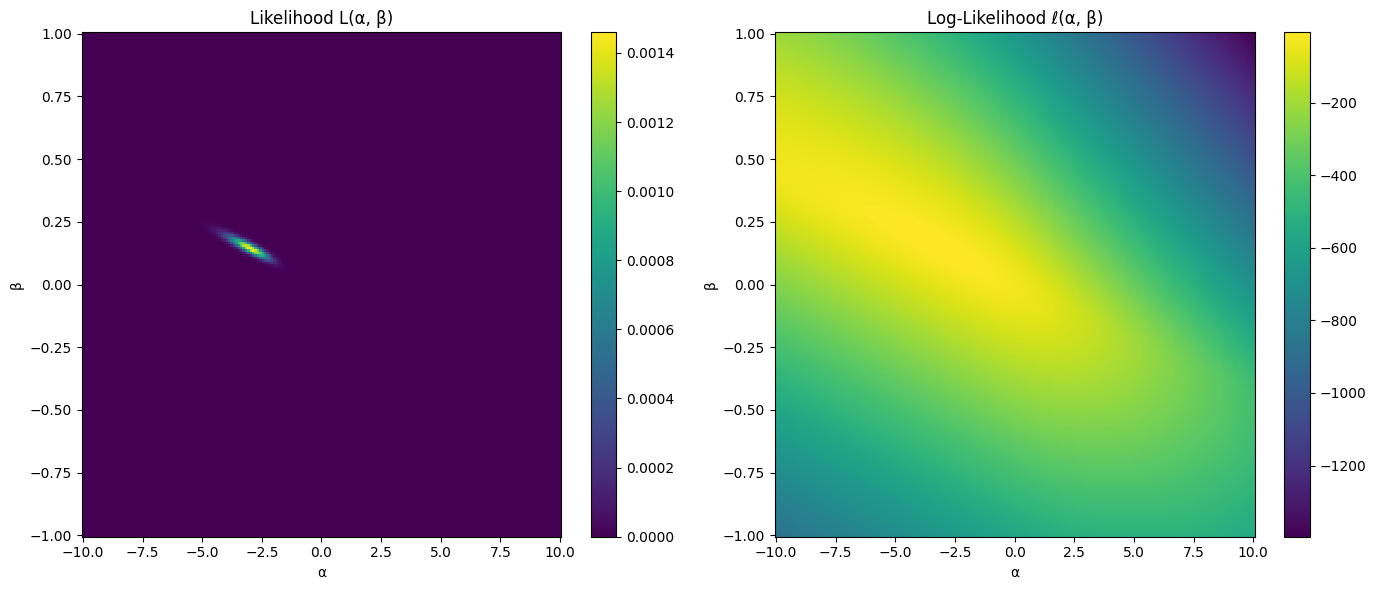

In [3]:
theta = np.array([0.1, 0.05])

# Grid ranges
alpha_vals = np.linspace(-10, 10, 200)
beta_vals = np.linspace(-1, 1, 200)

A, B = np.meshgrid(alpha_vals, beta_vals)

L = np.zeros_like(A)
LL = np.zeros_like(A)

# Compute likelihoods 
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        theta = (A[i, j], B[i, j])
        L[i, j] = lik(theta, x, y, n)
        LL[i, j] = log_lik(theta, x, y, n)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

pc1 = axes[0].pcolormesh(A, B, L, shading='auto')
axes[0].set_title("Likelihood L(α, β)")
axes[0].set_xlabel("α")
axes[0].set_ylabel("β")
fig.colorbar(pc1, ax=axes[0])

pc2 = axes[1].pcolormesh(A, B, LL, shading='auto')
axes[1].set_title("Log-Likelihood ℓ(α, β)")
axes[1].set_xlabel("α")
axes[1].set_ylabel("β")
fig.colorbar(pc2, ax=axes[1])

plt.tight_layout()
plt.show()


The likelihood function produces extremely small values. The surface is essentially zero everywhere beside a tiny area.

The log-likelihood however shows a smooth, continuous gradient spreading across the entire parameter space, clearly representing the geometry of this optimization problem. The logarithm brings the values into a manageable numerical range.

### Maximum Likelihood
minimizing the negative log-likelihood because it avoids issues that can arise when working with very small likelihood values

In [4]:
from scipy.optimize import minimize

initial_guess = [0.1, 0.05]

result = minimize(neg_log_lik, initial_guess, (x, y, n), method='BFGS')

alpha_ml, beta_ml = result.x

print(f"Maximum Likelihood Estimates: α_ML = {alpha_ml:.4f}, β_ML = {beta_ml:.4f}")

Maximum Likelihood Estimates: α_ML = -2.9776, β_ML = 0.1439


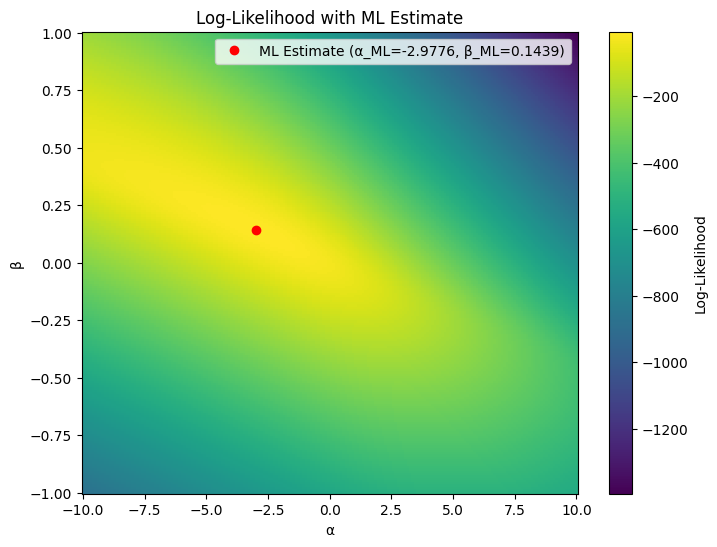

In [5]:
# Plot the likelihood function with the ML estimate
fig, ax = plt.subplots(figsize=(8, 6))

pc = ax.pcolormesh(A, B, LL, shading='auto', cmap="viridis")
ax.set_title("Log-Likelihood with ML Estimate")
ax.set_xlabel("α")
ax.set_ylabel("β")
fig.colorbar(pc, ax=ax, label="Log-Likelihood")

# Overlay the ML estimate
ax.plot(alpha_ml, beta_ml, 'ro', label=f"ML Estimate (α_ML={alpha_ml:.4f}, β_ML={beta_ml:.4f})")
ax.legend()

plt.show()

TODO: need to comment this plot

# Maximum A Posteriori Estimation

### Posterior (up to θ‑independent factor)


TODO: Derive an analytical expression of the posterior 𝑓(𝜃 ∣ 𝑦), up to a multiplicative factor not
depending on 𝜃.

## Log-posterior g(θ) = log f(θ | y) (up to additive constant)

TODO: Derive an analytical expression of the log-posterior 𝑔(𝜃) = log 𝑓(𝜃 ∣ 𝑦), up to an additive
factor not depending on 𝜃.



TODO: check sigma prior values

ML Estimates:  α = -2.9776, β = 0.1439
MAP Estimates: α = -2.7707, β = 0.1338
Differences:   Δα = 0.2069, Δβ = 0.0101


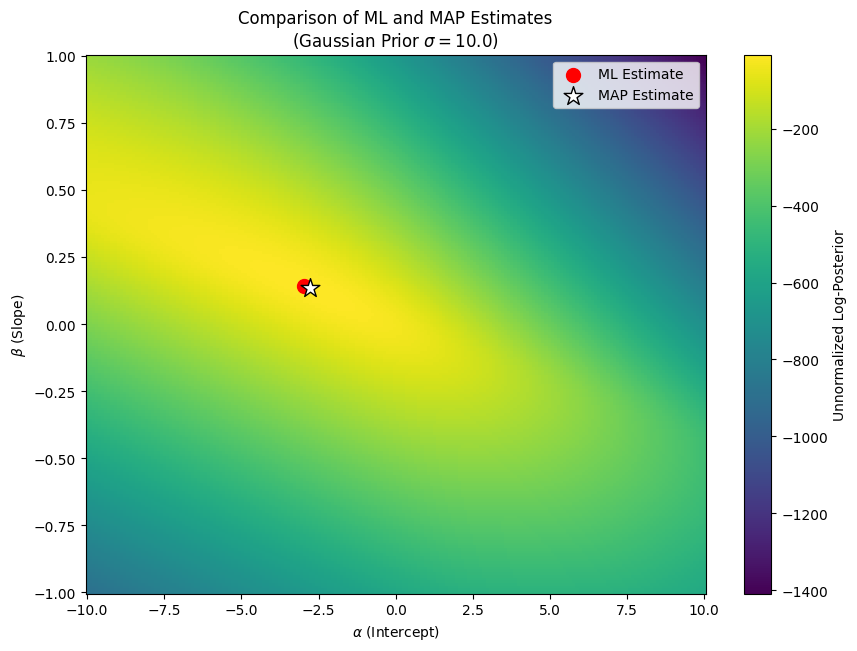

In [6]:
sigma_prior = 10.0

# Compute ML Estimate
res_ml = minimize(neg_log_lik, initial_guess, (x,y,n), method='BFGS')
alpha_ml, beta_ml = res_ml.x

# Compute MAP Estimate
res_map = minimize(neg_log_posterior, initial_guess,(x,y,n), method='BFGS')
alpha_map, beta_map = res_map.x

delta_alpha = abs(alpha_map - alpha_ml)
delta_beta = abs(beta_map - beta_ml)

print(f"ML Estimates:  α = {alpha_ml:.4f}, β = {beta_ml:.4f}")
print(f"MAP Estimates: α = {alpha_map:.4f}, β = {beta_map:.4f}")
print(f"Differences:   Δα = {delta_alpha:.4f}, Δβ = {delta_beta:.4f}")

# Compute posterior values on the grid
Z = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        # We compute the value for every point on the grid
        Z[i, j] = log_posterior([A[i, j], B[i, j]], x, y, n)

plt.figure(figsize=(10, 7))

# Plot unnormalized log-posterior 
pc = plt.pcolormesh(A, B, Z, shading='auto', cmap='viridis')
plt.colorbar(pc, label='Unnormalized Log-Posterior')

plt.scatter(alpha_ml, beta_ml, color='red', marker='o', s=100, label='ML Estimate', zorder=5)
plt.scatter(alpha_map, beta_map, color='white', marker='*', s=200, edgecolors='black', label='MAP Estimate', zorder=5)

plt.title(f'Comparison of ML and MAP Estimates\n(Gaussian Prior $\\sigma={sigma_prior}$)')
plt.xlabel('$\\alpha$ (Intercept)')
plt.ylabel('$\\beta$ (Slope)')
plt.legend()
plt.show()

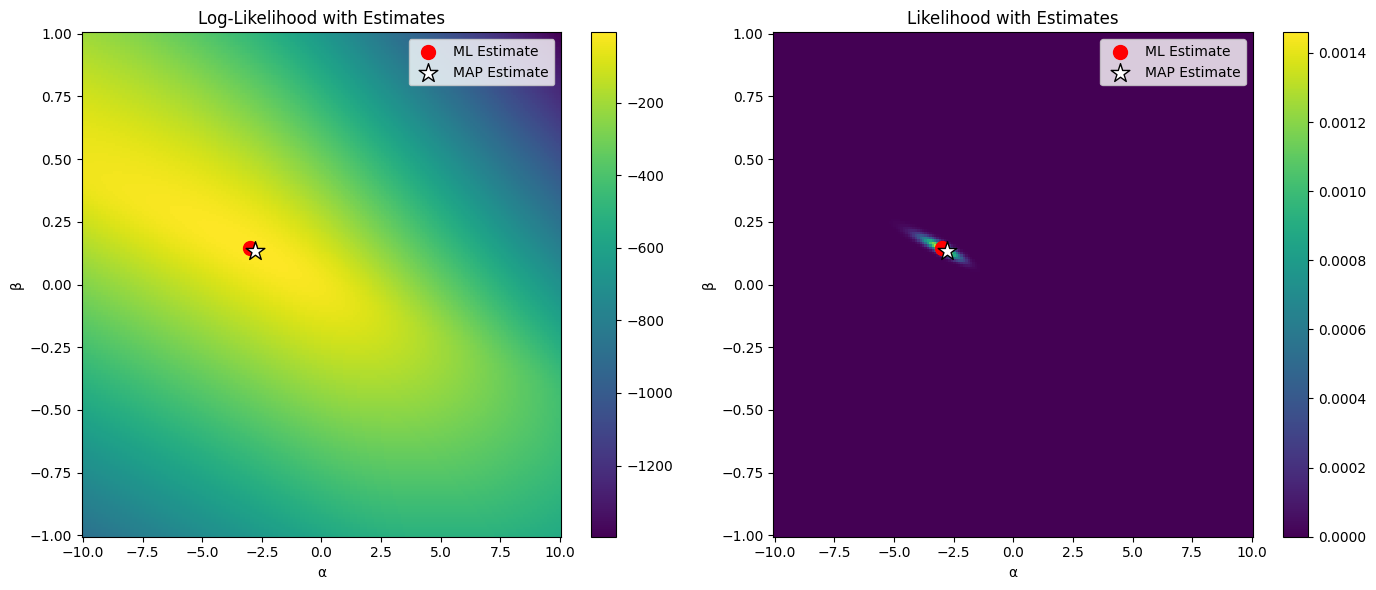

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- PLOT 1: Log-Likelihood ---
pc1 = axes[0].pcolormesh(A, B, LL, shading='auto', cmap="viridis")
axes[0].set_title("Log-Likelihood with Estimates")
axes[0].set_xlabel("α")
axes[0].set_ylabel("β")

axes[0].scatter(alpha_ml, beta_ml, color='red', marker='o', s=100, label='ML Estimate', zorder=5)
axes[0].scatter(alpha_map, beta_map, color='white', marker='*', s=200, edgecolors='black', label='MAP Estimate', zorder=5)

fig.colorbar(pc1, ax=axes[0]) 
axes[0].legend() 


# --- PLOT 2: Likelihood ---
pc2 = axes[1].pcolormesh(A, B, L, shading='auto', cmap="viridis")
axes[1].set_title("Likelihood with Estimates")
axes[1].set_xlabel("α")
axes[1].set_ylabel("β")

axes[1].scatter(alpha_ml, beta_ml, color='red', marker='o', s=100, label='ML Estimate', zorder=5)
axes[1].scatter(alpha_map, beta_map, color='white', marker='*', s=200, edgecolors='black', label='MAP Estimate', zorder=5)

fig.colorbar(pc2, ax=axes[1]) 
axes[1].legend() 

plt.tight_layout()
plt.show()


# 1.3 Brute-force posterior estimation

In [8]:
# from scipy.special import logsumexp

# # Compute unnormalized log-posterior on the grid
# log_post_grid = np.zeros_like(A)

# for i in range(A.shape[0]):
#     for j in range(A.shape[1]):
#         # We use the existing log_lik function here
#         theta = [A[i, j], B[i, j]]
#         log_post_grid[i, j] = log_posterior(theta, x, y, n)

# # --- Normalization Step ---
# # We use the LogSumExp trick for numerical stability
# # Normalization constant (in log domain):
# log_evidence = logsumexp(log_post_grid)

# # Normalized log-posterior:
# log_post_norm = log_post_grid - log_evidence

# # Exponentiate to get probabilities:
# posterior_norm = np.exp(log_post_norm)

# # --- Marginalization ---
# # Summing probability mass to get marginal distributions

# # Marginal for alpha (sum over beta rows)
# marginal_alpha = np.sum(posterior_norm, axis=0) 

# # Marginal for beta (sum over alpha columns)
# marginal_beta = np.sum(posterior_norm, axis=1)

# # --- Visualization ---

# fig = plt.figure(figsize=(12, 10))
# gs = fig.add_gridspec(2, 2, width_ratios=[3, 1], height_ratios=[1, 3],
#                       left=0.1, right=0.9, bottom=0.1, top=0.9,
#                       wspace=0.05, hspace=0.05)

# # 1. Main Plot: Joint Normalized Posterior
# ax_joint = fig.add_subplot(gs[1, 0])
# # Using pcolormesh as requested in previous turn
# pc = ax_joint.pcolormesh(A, B, posterior_norm, shading='auto', cmap='viridis')
# ax_joint.set_xlabel(r'$\alpha$ (Intercept)')
# ax_joint.set_ylabel(r'$\beta$ (Slope)')
# ax_joint.text(-5.5, 0.35, 'Joint Posterior', color='white', fontsize=12, fontweight='bold')

# # 2. Top Plot: Marginal Posterior for Alpha
# ax_alpha = fig.add_subplot(gs[0, 0], sharex=ax_joint)
# ax_alpha.plot(alpha_vals, marginal_alpha, color='blue', lw=2)
# ax_alpha.fill_between(alpha_vals, 0, marginal_alpha, color='blue', alpha=0.1)
# ax_alpha.set_ylabel(r'$p(\alpha | y)$')
# ax_alpha.set_title('Normalized Posterior and Marginals')
# plt.setp(ax_alpha.get_xticklabels(), visible=False)
# ax_alpha.grid(True, alpha=0.3)

# # 3. Right Plot: Marginal Posterior for Beta
# ax_beta = fig.add_subplot(gs[1, 1], sharey=ax_joint)
# ax_beta.plot(marginal_beta, beta_vals, color='green', lw=2)
# ax_beta.fill_betweenx(beta_vals, 0, marginal_beta, color='green', alpha=0.1)
# ax_beta.set_xlabel(r'$p(\beta | y)$')
# plt.setp(ax_beta.get_yticklabels(), visible=False)
# ax_beta.grid(True, alpha=0.3)

# plt.show()

In [9]:
# 1. Grid
alpha_vals = np.linspace(-4, 4, 150) 
beta_vals = np.linspace(-0.5, 0.5, 150)
A_grid, B_grid = np.meshgrid(alpha_vals, beta_vals)


# 2. Calculate log-posterior on grid
log_post_grid = np.zeros_like(A_grid)


for i in range(A_grid.shape[0]):
    for j in range(A_grid.shape[1]):
        a = A_grid[i, j]
        b = B_grid[i, j]
        log_lik_val = log_lik([a, b], x, y, n) 
        log_prior_val = stats.norm.logpdf(a, 0, 2) + stats.norm.logpdf(b, 0, 1)
        log_post_grid[i, j] = log_lik_val + log_prior_val


# 3. Normalization with log-sum-exp trick
max_log_post = np.max(log_post_grid)
posterior_unnorm = np.exp(log_post_grid - max_log_post)


d_alpha = alpha_vals[1] - alpha_vals[0]
d_beta = beta_vals[1] - beta_vals[0]
Z = np.sum(posterior_unnorm) * d_alpha * d_beta
posterior_norm = posterior_unnorm / Z


# 4. Marginals
marginal_alpha = np.sum(posterior_norm, axis=0) * d_beta
marginal_beta = np.sum(posterior_norm, axis=1) * d_alpha


# 5. Posterior means
mean_alpha = np.sum(alpha_vals * marginal_alpha) * d_alpha
mean_beta = np.sum(beta_vals * marginal_beta) * d_beta


print(f"Posterior Mean α: {mean_alpha:.4f}")
print(f"Posterior Mean β: {mean_beta:.4f}")


Posterior Mean α: -2.8215
Posterior Mean β: 0.1365


# 1.4 Metropolis

Chain 1 - Acceptance Rate: 31.92%
Chain 2 - Acceptance Rate: 31.37%
MCMC - Mean α: -2.6905, Mean β: 0.1300

Differences (Grid - MCMC):
  α: 0.1310
  β: 0.0065


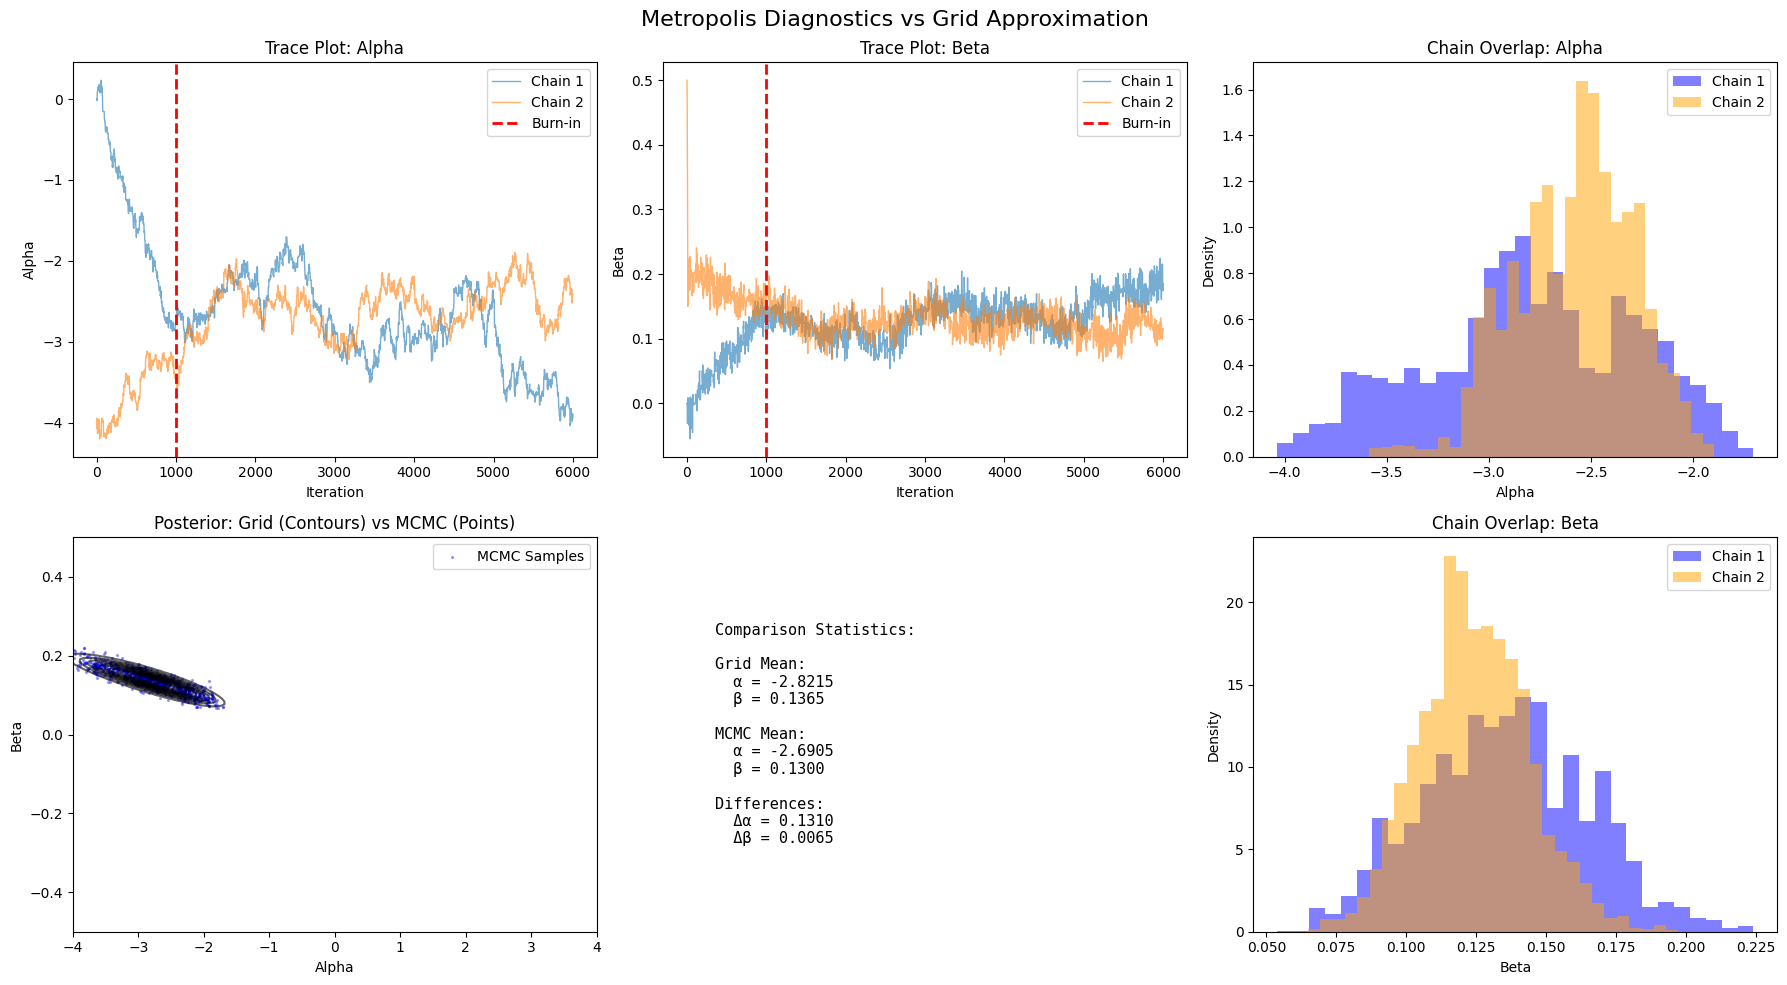

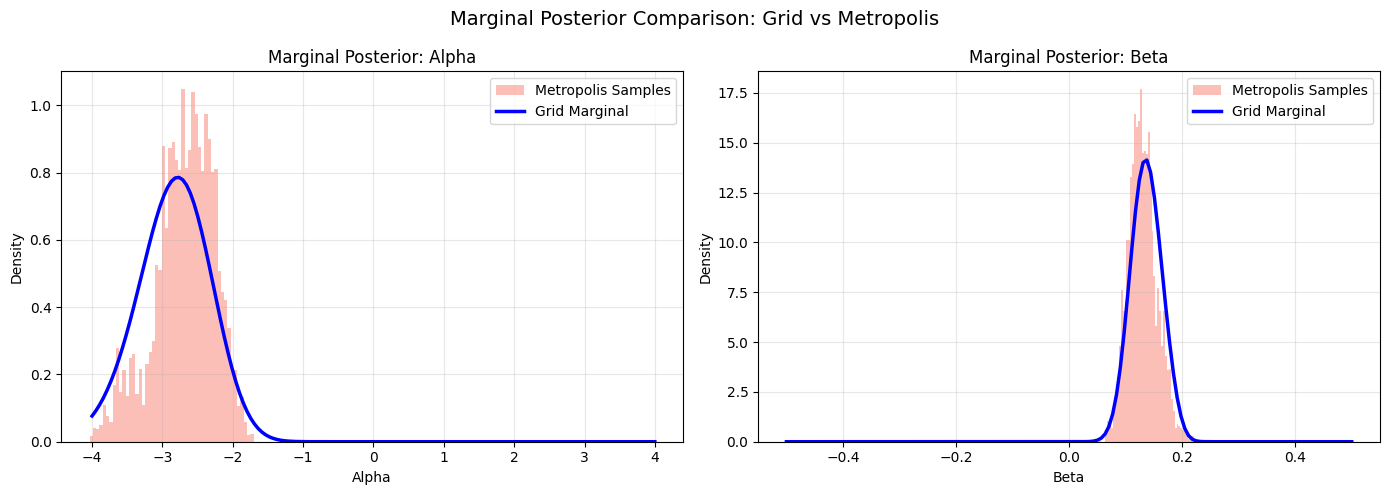

In [11]:
def metropolis_sampler(log_pdf_func, initial_theta, n_samples, step_scale, x, y, n):
    """
    Performs Metropolis sampling for 2D problem (alpha, beta).
    """
    samples = np.zeros((n_samples, 2)) 
    current_theta = np.array(initial_theta)
    current_log_prob = log_pdf_func(current_theta, x, y, n)
    accepted_count = 0
    
    for i in range(n_samples):
        # Proposal: Gaussian Random Walk
        proposal = current_theta + np.random.normal(loc=0, scale=step_scale, size=2)
        proposal_log_prob = log_pdf_func(proposal, x, y, n)
        
        # Acceptance ratio (in log scale)
        log_acceptance_ratio = proposal_log_prob - current_log_prob
        
        # Accept/Reject decision
        if np.log(np.random.rand()) < log_acceptance_ratio:
            current_theta = proposal
            current_log_prob = proposal_log_prob
            accepted_count += 1
        
        samples[i] = current_theta
        
    return samples, accepted_count / n_samples


# ==========================================
# METROPOLIS EXECUTION
# ==========================================
step_tuned = 0.05 
n_iter = 6000
burn_in = 1000
start_points = [[0, 0], [-4, 0.5]]

# Run two chains
chain1, acc1 = metropolis_sampler(log_posterior, start_points[0], n_iter, step_tuned, x, y, n)
chain2, acc2 = metropolis_sampler(log_posterior, start_points[1], n_iter, step_tuned, x, y, n)

print(f"Chain 1 - Acceptance Rate: {acc1:.2%}")
print(f"Chain 2 - Acceptance Rate: {acc2:.2%}")

# Remove burn-in
samples_1 = chain1[burn_in:]
samples_2 = chain2[burn_in:]

# Posterior mean from MCMC
mean_alpha_mcmc = np.concatenate([samples_1[:, 0], samples_2[:, 0]]).mean()
mean_beta_mcmc = np.concatenate([samples_1[:, 1], samples_2[:, 1]]).mean()

print(f"MCMC - Mean α: {mean_alpha_mcmc:.4f}, Mean β: {mean_beta_mcmc:.4f}")
print(f"\nDifferences (Grid - MCMC):")
print(f"  α: {abs(mean_alpha - mean_alpha_mcmc):.4f}")
print(f"  β: {abs(mean_beta - mean_beta_mcmc):.4f}")


# ==========================================
# INTEGRATED DIAGNOSTIC VISUALIZATION
# ==========================================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Metropolis Diagnostics vs Grid Approximation", fontsize=16)

# --- Trace Plots ---
axes[0, 0].plot(chain1[:, 0], alpha=0.6, label='Chain 1', lw=1)
axes[0, 0].plot(chain2[:, 0], alpha=0.6, label='Chain 2', lw=1)
axes[0, 0].axvline(burn_in, color='r', linestyle='--', linewidth=2, label='Burn-in')
axes[0, 0].set_title('Trace Plot: Alpha')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Alpha')
axes[0, 0].legend()

axes[0, 1].plot(chain1[:, 1], alpha=0.6, label='Chain 1', lw=1)
axes[0, 1].plot(chain2[:, 1], alpha=0.6, label='Chain 2', lw=1)
axes[0, 1].axvline(burn_in, color='r', linestyle='--', linewidth=2, label='Burn-in')
axes[0, 1].set_title('Trace Plot: Beta')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Beta')
axes[0, 1].legend()

# --- Contours (Grid) vs Scatter (Metropolis) ---
ax_comp = axes[1, 0]
ax_comp.contour(A_grid, B_grid, posterior_norm, levels=15, colors='k', alpha=0.6)
ax_comp.scatter(samples_1[::5, 0], samples_1[::5, 1], s=2, alpha=0.3, color='blue', label='MCMC Samples')
ax_comp.set_title('Posterior: Grid (Contours) vs MCMC (Points)')
ax_comp.set_xlabel('Alpha')
ax_comp.set_ylabel('Beta')
ax_comp.set_xlim([alpha_vals.min(), alpha_vals.max()])
ax_comp.set_ylim([beta_vals.min(), beta_vals.max()])
ax_comp.legend()

# --- Overlap Check: Alpha ---
axes[0, 2].hist(samples_1[:, 0], bins=30, density=True, alpha=0.5, label='Chain 1', color='blue')
axes[0, 2].hist(samples_2[:, 0], bins=30, density=True, alpha=0.5, label='Chain 2', color='orange')
axes[0, 2].set_title('Chain Overlap: Alpha')
axes[0, 2].set_xlabel('Alpha')
axes[0, 2].set_ylabel('Density')
axes[0, 2].legend()

# --- Overlap Check: Beta ---
axes[1, 2].hist(samples_1[:, 1], bins=30, density=True, alpha=0.5, label='Chain 1', color='blue')
axes[1, 2].hist(samples_2[:, 1], bins=30, density=True, alpha=0.5, label='Chain 2', color='orange')
axes[1, 2].set_title('Chain Overlap: Beta')
axes[1, 2].set_xlabel('Beta')
axes[1, 2].set_ylabel('Density')
axes[1, 2].legend()

# --- Comparison Statistics ---
axes[1, 1].axis('off')
stats_text = (
    f"Comparison Statistics:\n\n"
    f"Grid Mean:\n"
    f"  α = {mean_alpha:.4f}\n"
    f"  β = {mean_beta:.4f}\n\n"
    f"MCMC Mean:\n"
    f"  α = {mean_alpha_mcmc:.4f}\n"
    f"  β = {mean_beta_mcmc:.4f}\n\n"
    f"Differences:\n"
    f"  Δα = {abs(mean_alpha - mean_alpha_mcmc):.4f}\n"
    f"  Δβ = {abs(mean_beta - mean_beta_mcmc):.4f}"
)
axes[1, 1].text(0.1, 0.5, stats_text, fontsize=11, family='monospace',
                verticalalignment='center')

plt.tight_layout()
plt.show()


# ==========================================
# FINAL MARGINAL COMPARISON (Grid vs Metropolis)
# ==========================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Marginal Posterior Comparison: Grid vs Metropolis", fontsize=14)

# ---- Alpha ----
axes[0].hist(
    np.concatenate([samples_1[:, 0], samples_2[:, 0]]),
    bins=50, density=True,
    alpha=0.5, color='salmon', edgecolor='none',
    label='Metropolis Samples'
)
axes[0].plot(alpha_vals, marginal_alpha, color='blue', linewidth=2.5, label='Grid Marginal')
axes[0].set_title('Marginal Posterior: Alpha')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Density')
axes[0].legend(loc='upper right')
axes[0].grid(True, alpha=0.3)

# ---- Beta ----
axes[1].hist(
    np.concatenate([samples_1[:, 1], samples_2[:, 1]]),
    bins=50, density=True,
    alpha=0.5, color='salmon', edgecolor='none',
    label='Metropolis Samples'
)
axes[1].plot(beta_vals, marginal_beta, color='blue', linewidth=2.5, label='Grid Marginal')
axes[1].set_title('Marginal Posterior: Beta')
axes[1].set_xlabel('Beta')
axes[1].set_ylabel('Density')
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()